In [1]:
using Revise
includet("diatomic.jl")

using .diatomic_jl.MoleculeTypes
using .diatomic_jl


In [2]:
MoleculeOperator = Molecule.generateMolecule(K40Rb87, 2)
beams = Dict("B" =>Hamiltonian.OpticalBeam([1.0, 1.0, 1.0], [0, 0, 1.0]))

Hmol_I = Hamiltonian.generateHamiltonian(MoleculeOperator,  Beams = beams);# dirE = [1.0, 0, 0])


In [3]:
Hmol_S = Hamiltonian.generateHamiltonianSparse(MoleculeOperator, dirE = [1.0, 0.0, 0.0]);

In [10]:
getBasisUC(Hmol)

324-element Vector{Vector{Float64}}:
 [0.0, 0.0, -1.5, 1.5, -4.0, 4.0]
 [0.0, 0.0, -1.5, 1.5, -3.0, 4.0]
 [0.0, 0.0, -1.5, 1.5, -2.0, 4.0]
 [0.0, 0.0, -1.5, 1.5, -1.0, 4.0]
 [0.0, 0.0, -1.5, 1.5, 0.0, 4.0]
 [0.0, 0.0, -1.5, 1.5, 1.0, 4.0]
 [0.0, 0.0, -1.5, 1.5, 2.0, 4.0]
 [0.0, 0.0, -1.5, 1.5, 3.0, 4.0]
 [0.0, 0.0, -1.5, 1.5, 4.0, 4.0]
 [0.0, 0.0, -0.5, 1.5, -4.0, 4.0]
 ⋮
 [2.0, 2.0, 1.5, 1.5, -4.0, 4.0]
 [2.0, 2.0, 1.5, 1.5, -3.0, 4.0]
 [2.0, 2.0, 1.5, 1.5, -2.0, 4.0]
 [2.0, 2.0, 1.5, 1.5, -1.0, 4.0]
 [2.0, 2.0, 1.5, 1.5, 0.0, 4.0]
 [2.0, 2.0, 1.5, 1.5, 1.0, 4.0]
 [2.0, 2.0, 1.5, 1.5, 2.0, 4.0]
 [2.0, 2.0, 1.5, 1.5, 3.0, 4.0]
 [2.0, 2.0, 1.5, 1.5, 4.0, 4.0]

In [23]:
AM_Toolbox.getBasisFC(Hmol.MolOp.basisTree, "N")

324-element Vector{Vector{Float64}}:
 [0.0, 0.0, 2.5, -2.5, 1.5, 4.0]
 [-1.0, 1.0, 2.5, -2.5, 1.5, 4.0]
 [0.0, 1.0, 2.5, -2.5, 1.5, 4.0]
 [1.0, 1.0, 2.5, -2.5, 1.5, 4.0]
 [-2.0, 2.0, 2.5, -2.5, 1.5, 4.0]
 [-1.0, 2.0, 2.5, -2.5, 1.5, 4.0]
 [0.0, 2.0, 2.5, -2.5, 1.5, 4.0]
 [1.0, 2.0, 2.5, -2.5, 1.5, 4.0]
 [2.0, 2.0, 2.5, -2.5, 1.5, 4.0]
 [0.0, 0.0, 2.5, -1.5, 1.5, 4.0]
 ⋮
 [0.0, 0.0, 5.5, 5.5, 1.5, 4.0]
 [-1.0, 1.0, 5.5, 5.5, 1.5, 4.0]
 [0.0, 1.0, 5.5, 5.5, 1.5, 4.0]
 [1.0, 1.0, 5.5, 5.5, 1.5, 4.0]
 [-2.0, 2.0, 5.5, 5.5, 1.5, 4.0]
 [-1.0, 2.0, 5.5, 5.5, 1.5, 4.0]
 [0.0, 2.0, 5.5, 5.5, 1.5, 4.0]
 [1.0, 2.0, 5.5, 5.5, 1.5, 4.0]
 [2.0, 2.0, 5.5, 5.5, 1.5, 4.0]

In [4]:

MoleculeOperator = Molecule.generateMolecule(K40Rb87T, 2)
Hmol = Hamiltonian.generateHamiltonian(MoleculeOperator, dirE = [1.0, 0.0, 0.0]);

In [24]:
param = solve.diagonalize(Hmol, 200e-4, 424e2)
#stateOI =  State([0.0, 1.0, 0.5, 1.5, -4.0, 4.0], Hmol)
stateOI =  State(param.vec[:, 37], Hmol)
_, eigvec, eigsol, tdm = calculate.findTransition(Hmol,stateOI,  param, comp = [1.0, 1.0, 1.0],[0], NumOfStates = 10)

Starting from 0.852 | -4.0, 1.5, 1.0, 0.0 > + 0.077 | -4.0, 0.5, 1.0, 1.0 > + 0.047 | -4.0, 0.5, 1.0, -1.0 >


(324, 324) (324, 324) (324, 324)


State: 0.999 | -4.0, 1.5, 0.0, 0.0 > + 0.001 | -4.0, 1.5, 1.0, 1.0 > + 0.001 | -4.0, 1.5, 1.0, -1.0 >	| Energy (MHz): -2229.335588518519
	 TDM [sigma_m, pi, sigma_p] = [-2.9976720807534315e-14, -0.30774083715903344, -5.283716607917805e-14]
State: 0.999 | -4.0, 0.5, 0.0, 0.0 > + 0.001 | -4.0, 0.5, 1.0, 1.0 > + 0.001 | -4.0, 0.5, 1.0, -1.0 >	| Energy (MHz): -2229.065332024032
	 TDM [sigma_m, pi, sigma_p] = [-0.07200922084752563, -1.7347582746473092e-13, -0.09244607454419955]
State: 0.999 | -3.0, 1.5, 0.0, 0.0 > + 0.001 | -3.0, 1.5, 1.0, 1.0 > + 0.001 | -3.0, 1.5, 1.0, -1.0 >	| Energy (MHz): -2229.289335584926
	 TDM [sigma_m, pi, sigma_p] = [0.034995867521835505, -4.18528094310857e-14, 0.028643640484496972]
State: 0.999 | -4.0, -1.5, 0.0, 0.0 > + 0.001 | -4.0, -1.5, 1.0, 1.0 > + 0.001 | -4.0, -1.5, 1.0, -1.0 >	| Energy (MHz): -2228.5239950014834
	 TDM [sigma_m, pi, sigma_p] = [0.005634269142621388, 3.24339100156297e-14, 0.01115456557940215]
State: 0.998 | -2.0, 1.5, 0.0, 0.0 > + 0.001 | -

([1, 7, 2, 25, 3, 9, 18, 4, 16, 11  …  8, 28, 26, 34, 19, 12, 35, 30, 21, 36], ComplexF64[9.15551477996578e-18 + 0.0im -0.000350459053534111 + 0.0im … 5.3624020618706036e-17 + 0.0im 7.83370084513081e-8 + 0.0im; 5.447897247335359e-6 + 0.0im -2.0654618283874668e-14 + 0.0im … 0.01536987610627841 + 0.0im -9.604188574335536e-14 + 0.0im; … ; -9.230178989811419e-21 + 0.0im -3.460232236765424e-20 + 0.0im … -3.1524972001121126e-18 + 0.0im -2.534192398295713e-16 + 0.0im; 7.084462641936842e-20 - 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im], [-2.2293355885185194e9, -2.229065332024032e9, -2.229289335584926e9, -2.2285239950014834e9, -2.2292430703562007e9, -2.229016986223598e9, -2.2287443797007008e9, -2.2291967932325044e9, -2.228794800347319e9, -2.2289686430345163e9], [-2.9976720807534315e-14 -0.30774083715903344 -5.283716607917805e-14; -0.07200922084752563 -1.7347582746473092e-13 -0.09244607454419955; … ; -5.179653958732791e-14 -0.001824960049652415 -4.058797934891057e-14; 0.0007870365643156013 1.63

In [25]:
param.vec

324×324 Matrix{ComplexF64}:
  9.15551e-18+0.0im   -1.53037e-9+0.0im  …    1.10872e-9+0.0im
    5.4479e-6+0.0im  -1.10559e-14+0.0im      4.89299e-16+0.0im
  5.61398e-18+0.0im   -7.10675e-6+0.0im       6.89011e-8+0.0im
   1.36867e-6+0.0im   1.17765e-13+0.0im      2.96054e-16+0.0im
 -3.33586e-18+0.0im   -2.12237e-6+0.0im       1.52139e-6+0.0im
 -5.82472e-10+0.0im  -3.97767e-17+0.0im  …   -7.3558e-17+0.0im
  1.02647e-17+0.0im   8.56975e-10+0.0im       1.83999e-5+0.0im
  9.83468e-14+0.0im  -5.33165e-18+0.0im     -2.97885e-15+0.0im
 -2.12911e-17+0.0im  -9.98262e-13+0.0im      0.000155494+0.0im
  0.000350829+0.0im  -1.17767e-14+0.0im      6.88548e-17+0.0im
             ⋮                           ⋱  
  0.000183728+0.0im  -1.31648e-17+0.0im  …   1.27121e-13+0.0im
 -4.40621e-19+0.0im   -0.00018371+0.0im       6.13066e-7+0.0im
  -4.25751e-8+0.0im  -3.01006e-18+0.0im       6.2549e-14+0.0im
  2.14078e-19+0.0im    6.38415e-8+0.0im       1.05794e-5+0.0im
  8.84152e-12+0.0im   3.04376e-18+0.0im      

In [45]:
zeemanScan = solve.scanZeeman(Hmol, [0:2:50...]*1e-4, 420e2)#, nev = 10);
starkScan = solve.scanStark(Hmol, 0.1e-4, [0:100:1000...]*1e2)#, nev = 10);
IntensityScan = solve.scanIntensity(Hmol_I, 0.1e-4, 420e2, [0:0.1:1...]*278327e2);

In [42]:
stateOI =  State([0.0, 0.0, 0.5, 1.5, -4.0, 4.0], Hmol)
KetName(calculate.diabaticRamp(Hmol, stateOI, zeemanScan, [50.0, 2]*1e-4), Hmol)

"0.536 | -3.0, -0.5, 0.0, 0.0 > + 0.326 | -2.0, -1.5, 0.0, 0.0 > + 0.129 | -4.0, 0.5, 0.0, 0.0 >"

In [50]:
zeemanScan = solve.scanZeeman(Hmol, [38.910:0.0001:38.916...]*1e-4, 0)#, nev = 10);
avoidedCrossings = calculate.findAvoidedCrossing(stateOI, zeemanScan, [40, 0]*1e-4)

1-element Vector{Any}:
 [0.003891055, 0.16665326160000404]

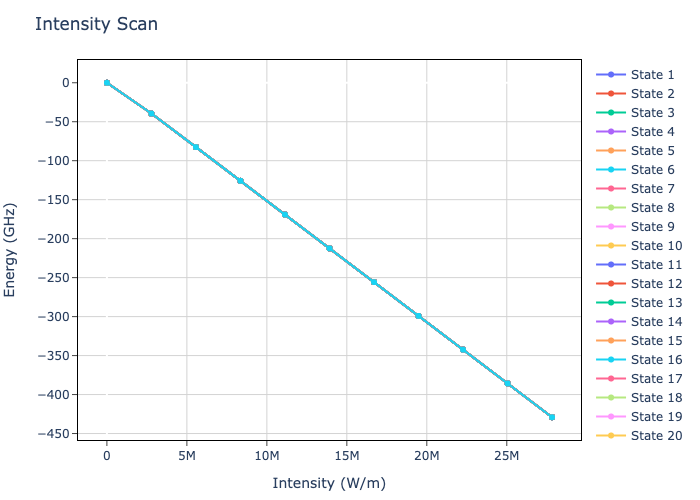

In [8]:
plotting.plotIntensityScan(Hmol_I, IntensityScan, N = [0])

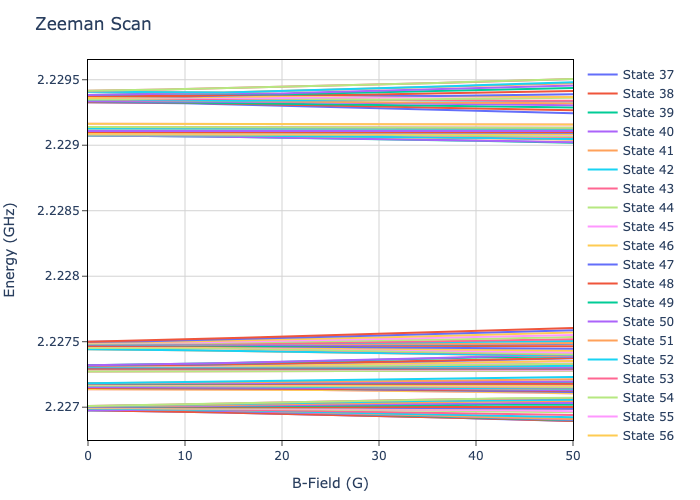

In [13]:
plotting.plotZeemanMap(Hmol, zeemanScan, N = [1])

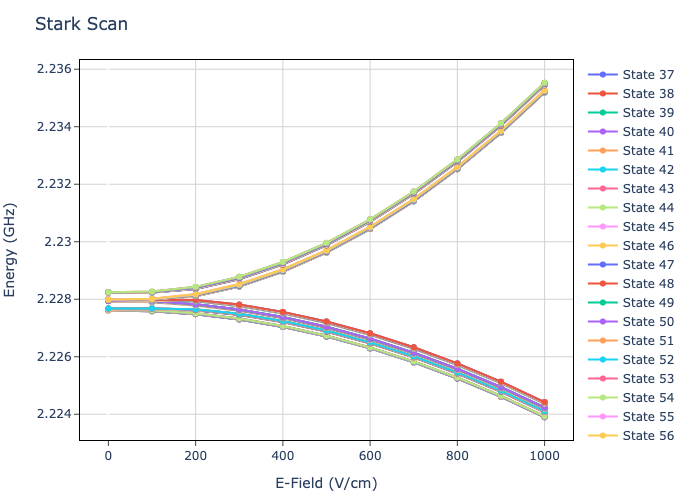

In [10]:
plotting.plotStarkMap(Hmol, starkScan, N = [1])

In [21]:
spzeros(ComplexF64, 3, 3)

3×3 SparseMatrixCSC{ComplexF64, Int64} with 0 stored entries:
     ⋅          ⋅          ⋅    
     ⋅          ⋅          ⋅    
     ⋅          ⋅          ⋅    

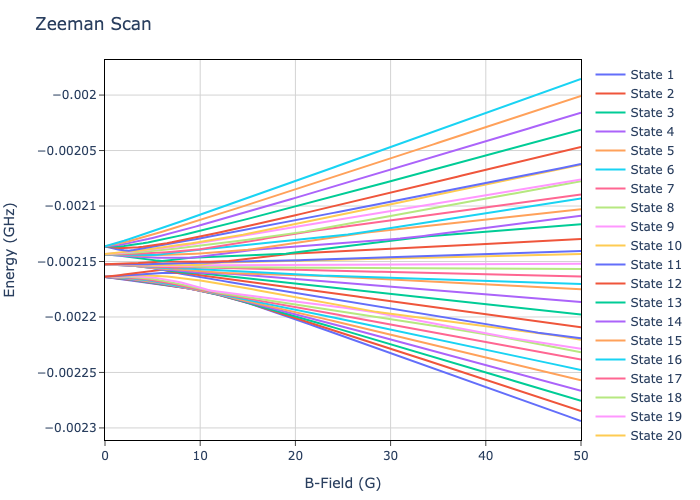

In [19]:
plotting.plotZeemanMap(h, ZeemanMap)